# Homework 03 - Python introduction

### Exercise 1 - Terminology

Describe the following terms with your own words:

***Function:*** A function is a chunk of code that takes input arguments (if required), preforms a sequence of operations including the provided iput argumentsand returns a function output.

***Variable:*** A variable consists of a variable name and data that is loaded into the memory. The variable points to the data object location in the memory.

***Calling a function:*** A function is called by its function name and passing variables or existing variables to the required input arguments of the function. 

***String:*** A string is a sequence of characters that is delimited by quotation marks that define the start and the end of the string sequence.

### Exercise 2 - spurious correlations

Reproduce a *spurious correlations* plot using `plt.plot()`. 

First plot both time series as percentage of the last data point (i.e. years on the x-axis, relative data on the y-axis). Then plot the relation between both data sets as scatter plot by using `plt.plot(dataset1, dataset2, 'o')`.

Analyse both plots, come up with a wrong conclusion and explain why it is wrong.

Don't forget to label the axis!

<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2012/06/label-your-axes.png?w=500&ssl=1" alt="It is important to always label the axes" style="width: 400px;"/>


![Spurious correlations](spurious-correlations.svg)

Source: https://www.tylervigen.com/spurious-correlations

In [3]:
sociology_doctorates = [601, 579, 572, 617, 566, 547, 597, 580, 536, 579, 576, 601, 664]
space_launches = [54, 46, 42, 50, 43, 41, 46, 39, 37, 45, 45, 41, 54]
years = list(range(1997, 2009 + 1))

#### Reproduction of the spurious correlation plot

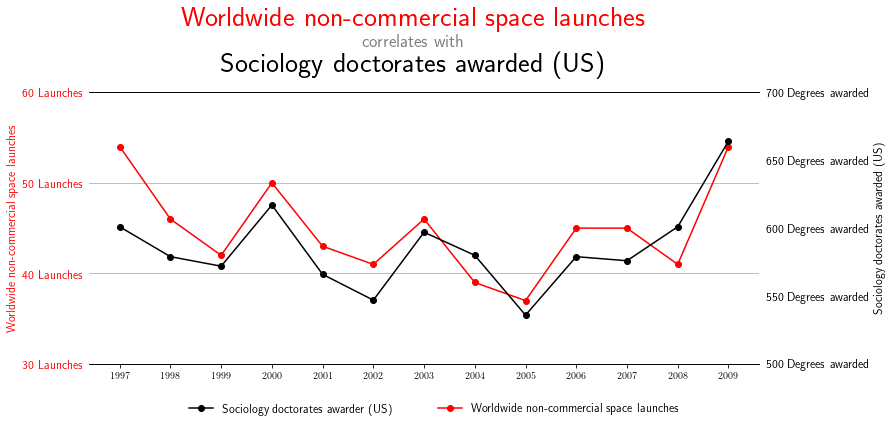

In [4]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
from matplotlib import pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize = (12,5))
ax2 = ax1.twinx()

fig.text(0.5, 1.05, 'Worldwide non-commercial space launches', 
         fontsize = 28, color = 'red', ha = 'center', va = 'bottom')
fig.text(0.5, 1.0, 'correlates with', 
         fontsize = 18, color = 'grey', ha = 'center', va = 'bottom')
fig.text(0.5, 0.92, 'Sociology doctorates awarded (US)', 
         fontsize = 28, color = 'black', ha = 'center', va = 'bottom')

ax1.plot(years, space_launches, color='red', marker='o', linestyle='solid', 
         label = 'Worldwide non-commercial space launches')
ax2.plot(years, sociology_doctorates, color='black', marker='o', linestyle='solid', 
         label = 'Sociology doctorates awarder (US)')

ax1.set_ylabel('Worldwide non-commercial space launches', color = 'red', fontsize = 12)
ax2.set_ylabel('Sociology doctorates awarded (US)', color = 'black', fontsize = 12)
ax1.set_xticks(np.arange(min(years), max(years)+1, 1.0))
ax1.set_yticks(np.arange(30, 61, 10))
ax2.set_yticks(np.arange(500, 701, 50))
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax1.set_yticklabels([f'{i} Launches' for i in range(30,70,10)], color = 'red', fontsize = 12)
ax2.set_yticklabels([f'{i} Degrees awarded' for i in range(500,750,50)], color = 'black', fontsize = 12)
ax1.yaxis.set_ticks_position('none') 
ax2.yaxis.set_ticks_position('none') 

ax1.grid(axis='y')

#plt.title('Infections')
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),

ax1.legend(loc='upper center', bbox_to_anchor=(0.7, -0.1), frameon = False, fontsize = 12)
ax2.legend(loc='upper center', bbox_to_anchor=(0.3, -0.1), frameon = False, fontsize = 12)

#### Plotting timeseries of relative data (with reference of last data point)

In [5]:
soc_doc_rel = [sd_i/sociology_doctorates[-1] for sd_i in sociology_doctorates]
spa_lau_rel = [sl_i/space_launches[-1] for sl_i in space_launches]

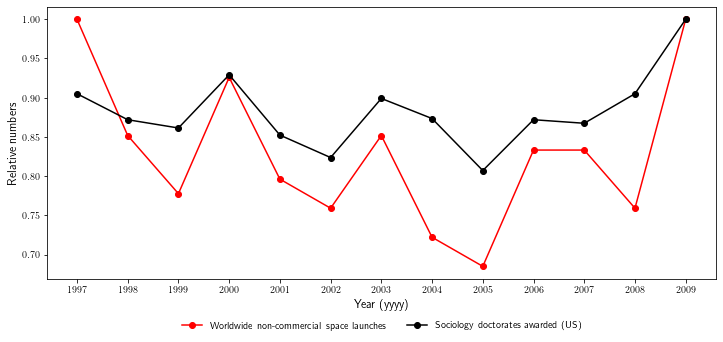

In [6]:
fig, ax = plt.subplots(figsize = (12,5))

ax.plot(years, spa_lau_rel, color='red', marker='o', linestyle='solid', 
         label = 'Worldwide non-commercial space launches')
ax.plot(years, soc_doc_rel, color='black', marker='o', linestyle='solid', 
         label = 'Sociology doctorates awarded (US)')

ax.set_ylabel('Relative numbers', color = 'black', fontsize = 12)
ax.set_xlabel('Year (yyyy)', color = 'black', fontsize = 12)
ax.set_xticks(np.arange(min(years), max(years)+1, 1.0))

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), frameon = False, ncol = 2)

#### Scatter plot for relative values of both data sets 

Text(0, 0.5, 'Sociology doctorates awarded (US)')

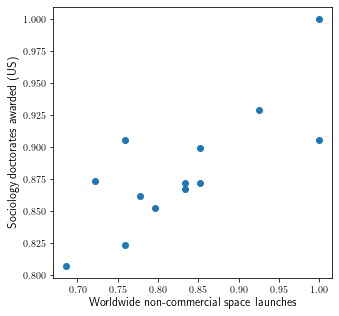

In [7]:
fig, ax = plt.subplots(figsize = (5,5))

ax.plot(spa_lau_rel, soc_doc_rel, marker='o', linestyle='none')
ax.set_xlabel('Worldwide non-commercial space launches', color = 'black', fontsize = 12)
ax.set_ylabel('Sociology doctorates awarded (US)', color = 'black', fontsize = 12)

#### Conclusion?

I am not sure what is meant to come up with a "wrong" conclusion. Independent of the absolute and the relative numbers in the plots the temporal upwards and downwards movements of both variables coincide. Yet, the amplitude of the variability of the numbers of space launces is large. In any case however, correlation, coincidence, and causality are not the same things (which is the principle point of the spurious correlation blog). 

### Exercise 3 - Flatten the curve

Use the logistic growth model to plot an overslimplified version of the [#flattenthecurve](https://www.biospace.com/getasset/fc2b8ad6-697f-49d5-827e-50f4901baf53/) [graphs](https://evilspeculator.com/wp-content/uploads/2020/03/flattenthecurve.jpg).

Write a function `new_infections(t, k)` which returns the number of new infections given by the following formula:

$i_{\textrm{new}}(t) := \frac{e^\left(-k \cdot P \cdot t\right) \cdot k \cdot P^2 \cdot \left(-1 + \frac{P}{i_0}\right)}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(-1 + \frac{P}{i_0}\right) \right)^2}$

Plot the number of infections for $t=0,\ldots,250$, $P=1\,000\,000$, $i_0=1$ and $k= \frac{3}{P \cdot 10}$.

Also plot a second constant line and label it with "healthcare system capacity".

Then analyse the plot for different values of $k$ and explain in detail why one should not use this model/plot to predict the outcome of an epedemic.

Bonus question: Is there something one can still learn from it?

##### Motivation

The motivation is not important for the programming task. There is no need to understand all details in order to do the exercise.

For a fixed population with $P$ individuals, $i(t)$ is the number of infections at time $t$. We assume that every individual stays infectious once infected. 

Choosing a random pair of individuals from the population, a new infection will take place with probabilty $2 \cdot \frac{i(t)}{P} \cdot \frac{P - i(t)}{P}$. If we assume that every infected individual will meet approximately $c$ others in every time step (and infect them if they are not yet infected), there is a total number of contacts $\frac{c \cdot P}{2}$ in every time step. That means we expect a total number of new infections:

$i_{\textrm{new}}(t) = \frac{c \cdot P}{2} \cdot 2 \cdot \frac{i(t)}{P} \cdot \frac{P - i(t)}{P} = \underbrace{\frac{c}{P}}_{=:k} \cdot \left(i(t) \cdot \left(P - i(t)\right) \right)$

This leads to the differential equation:

$i'(t) = i_{\textrm{new}}(t) = k \cdot \left(i(t) \cdot \left(P - i(t)\right) \right)$

A solution is given by:

$i(t) = \frac{P}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(\frac{P}{i_0} - 1\right)\right)}$

Differanting $i(t)$ gives the number of new infections:

$i_{\textrm{new}}(t) := i'(t) = \frac{e^\left(-k \cdot P \cdot t\right) \cdot k \cdot P^2 \cdot \left(-1 + \frac{P}{i_0}\right)}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(-1 + \frac{P}{i_0}\right) \right)^2}$


[3blue1brown](https://www.youtube.com/watch?v=gxAaO2rsdIs) has a great video on the topic. If you are interested in a model which is a bit closer to the real world, but still quite simple, have a look at the [SIR model](https://www.youtube.com/watch?v=Qrp40ck3WpI). A large part of this is inspired by the [German Wikipiedia page](https://de.wikipedia.org/wiki/Logistische_Funktion

##### Solution

Write your code here:

*Function definition*

In [30]:
import math

def new_infections(t, k, P, i_0):
    i_new = (math.exp(-k*P*t) * k * P**2 * (-1 + P/i_0)) / (1 + math.exp(-k*P*t) * (-1 + P/i_0))**2
    return(i_new)

*Calcualte new infections*

In [48]:
P = 1000000
i_0 = 1
c = [x / 10.0 for x in range(5, 35, 5)]
k = [c_i/(P*10) for c_i in c]
t = range(250)
capacity = 10000


i_dict = {k_i:[new_infections(t_i,k_i,P, i_0) for t_i in t] for k_i in k}

*Plot infections over time*

<function matplotlib.pyplot.show(*args, **kw)>

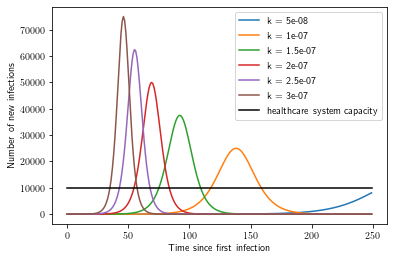

In [59]:
[plt.plot(t,i_ki, label = f'k = {k_i}') for k_i,i_ki in i_dict.items()]
plt.plot(t,len(t)*[capacity], 'black', label = "healthcare system capacity")
plt.xlabel("Time since first infection")
plt.ylabel("Number of new infections")
plt.legend()
plt.show

##### Bonus: Interactive plot

If you want an interactive widget to control the parameter c, you can use the following Code.
**Warning:** After running `%matplotlib notebook` you cannot plot in other cells anylonger. Restart the Jupyter kernel and the refresh the browser window to disable again.

```Python
%matplotlib notebook
from ipywidgets import interact

line, = plt.plot(x, y)

# write here more plotting code (axis label etc)

def update(c=3.0/10.):
    line.set_ydata([new_infections(t, c  / P) for t in time_range])

interact(update);
```

### Exercise 4 - Fibonacci 

Write a function `fibonacci(n)` which calculates the n-th [Fibonacci number](https://en.wikipedia.org/wiki/Fibonacci_number), defined by $f(0)=0$, $f(1)=1$ and $f(n) = f(n-1)+f(n-2)$.

Use the function to calculate $f(100)$.

In [36]:
def fibonacci(n):
    f = [0,1]
    [f.append(f[-1] + f[-2]) for i in range(2, n+1, 1)]
    return(f[n])

In [45]:
f_100 = fibonacci(100)
print(f_100)

354224848179261915075
